In [1]:
from urllib.request import urlretrieve
import pypowsybl as pp
import pandas as pd
import logging
import os
import zipfile
import plotly.express as px

logging.basicConfig()
logging.getLogger().setLevel(logging.INFO)
logging.getLogger('powsybl').setLevel(logging.ERROR)
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s')

test_configurations_zip = "TestConfigurations_packageCASv2.0.zip"
temp_extract = "/tmp/extract/"
t5_edd_extracted = "./MicroGrid_Type5_EDD/"

timestamps = ["20171002T2230Z",
        "20171002T2330Z",
        "20171003T0030Z",
        "20171003T0130Z",
        "20171003T0230Z",
        "20171003T0330Z",
        "20171003T0430Z",
        "20171003T0530Z",
        "20171003T0630Z",
        "20171003T0730Z",
        "20171003T0830Z",
        "20171003T0930Z",
        "20171003T1030Z",
        "20171003T1130Z",
        "20171003T1230Z",
        "20171003T1330Z",
        "20171003T1430Z",
        "20171003T1530Z",
        "20171003T1630Z",
        "20171003T1730Z",
        "20171003T1830Z",
        "20171003T1930Z",
        "20171003T2030Z",
        "20171003T2130Z"]

# download test configurations
logging.info(f'downloading {test_configurations_zip} ...')
urlretrieve("https://www.entsoe.eu/Documents/CIM_documents/Grid_Model_CIM/" + test_configurations_zip, test_configurations_zip)

# extract
logging.info(f'extracting ...')
with zipfile.ZipFile(test_configurations_zip, 'r') as zip_ref:
    zip_ref.extractall("/tmp/extract")
os.remove(test_configurations_zip)

# extract the two MicroGrid/Type5_EDD zips
for zip in ["BE", "BD"]:
    with zipfile.ZipFile(temp_extract + "/MicroGrid/Type5_EDD/CGMES_v2.4.15_MicroGridTestConfiguration-T5_" + zip + "_v1.zip", 'r') as zip_ref:
        zip_ref.extractall(t5_edd_extracted)

# extract individual zips
for item in os.listdir(t5_edd_extracted): # loop through items in dir
    if item.endswith(".zip"): # check for ".zip" extension
        file_name = os.path.abspath(t5_edd_extracted + '/' + item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(t5_edd_extracted) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file
        
# build zip per TS
eqbd = t5_edd_extracted + "20171002T0930Z_ENTSO-E_EQ_BD_2.xml"
tpbd = t5_edd_extracted + "20171002T0930Z_ENTSO-E_TP_BD_2.xml"
eq = t5_edd_extracted + "20171002T2230Z_BE_EQ_1.xml"

for ts in timestamps:
    ssh = t5_edd_extracted + ts + "_1D_BE_SSH_1.xml"
    tp = t5_edd_extracted + ts + "_1D_BE_TP_1.xml"
    sv = t5_edd_extracted + ts + "_1D_BE_SV_1.xml"
    ts_zip = t5_edd_extracted + ts + '.zip'
    logging.info(f'building {ts_zip} ...')
    with zipfile.ZipFile(ts_zip, 'w') as tszip:
        for f in [eqbd, tpbd, eq, ssh, tp, sv]:   
            tszip.write(f)
    os.remove(ssh)
    os.remove(tp)
    os.remove(sv)

os.remove(tpbd)
os.remove(eqbd)
os.remove(eq)

INFO:root:downloading TestConfigurations_packageCASv2.0.zip ...
INFO:root:extracting ...
INFO:root:building ./MicroGrid_Type5_EDD/20171002T2230Z.zip ...
INFO:root:building ./MicroGrid_Type5_EDD/20171002T2330Z.zip ...
INFO:root:building ./MicroGrid_Type5_EDD/20171003T0030Z.zip ...
INFO:root:building ./MicroGrid_Type5_EDD/20171003T0130Z.zip ...
INFO:root:building ./MicroGrid_Type5_EDD/20171003T0230Z.zip ...
INFO:root:building ./MicroGrid_Type5_EDD/20171003T0330Z.zip ...
INFO:root:building ./MicroGrid_Type5_EDD/20171003T0430Z.zip ...
INFO:root:building ./MicroGrid_Type5_EDD/20171003T0530Z.zip ...
INFO:root:building ./MicroGrid_Type5_EDD/20171003T0630Z.zip ...
INFO:root:building ./MicroGrid_Type5_EDD/20171003T0730Z.zip ...
INFO:root:building ./MicroGrid_Type5_EDD/20171003T0830Z.zip ...
INFO:root:building ./MicroGrid_Type5_EDD/20171003T0930Z.zip ...
INFO:root:building ./MicroGrid_Type5_EDD/20171003T1030Z.zip ...
INFO:root:building ./MicroGrid_Type5_EDD/20171003T1130Z.zip ...
INFO:root:build

In [2]:
df_loads_all_ts = []
for ts in timestamps:
    cgmes_zip = t5_edd_extracted + ts + ".zip"
    logging.info(f'Loading {cgmes_zip} in PowSyBl ...')
    ts_network = pp.network.load(cgmes_zip)
    df_loads = ts_network.get_loads().copy()
    df_loads['ts'] = ts
    df_loads_all_ts.append(df_loads)

df = pd.concat(df_loads_all_ts)
logging.info(f'Completed loading {len(timestamps)} in PowSyBl')

INFO:root:Loading ./MicroGrid_Type5_EDD/20171002T2230Z.zip in PowSyBl ...
INFO:root:Loading ./MicroGrid_Type5_EDD/20171002T2330Z.zip in PowSyBl ...
INFO:root:Loading ./MicroGrid_Type5_EDD/20171003T0030Z.zip in PowSyBl ...
INFO:root:Loading ./MicroGrid_Type5_EDD/20171003T0130Z.zip in PowSyBl ...
INFO:root:Loading ./MicroGrid_Type5_EDD/20171003T0230Z.zip in PowSyBl ...
INFO:root:Loading ./MicroGrid_Type5_EDD/20171003T0330Z.zip in PowSyBl ...
INFO:root:Loading ./MicroGrid_Type5_EDD/20171003T0430Z.zip in PowSyBl ...
INFO:root:Loading ./MicroGrid_Type5_EDD/20171003T0530Z.zip in PowSyBl ...
INFO:root:Loading ./MicroGrid_Type5_EDD/20171003T0630Z.zip in PowSyBl ...
INFO:root:Loading ./MicroGrid_Type5_EDD/20171003T0730Z.zip in PowSyBl ...
INFO:root:Loading ./MicroGrid_Type5_EDD/20171003T0830Z.zip in PowSyBl ...
INFO:root:Loading ./MicroGrid_Type5_EDD/20171003T0930Z.zip in PowSyBl ...
INFO:root:Loading ./MicroGrid_Type5_EDD/20171003T1030Z.zip in PowSyBl ...
INFO:root:Loading ./MicroGrid_Type5_ED

In [3]:
display(df)

,name,type,p0,q0,p,q,i,voltage_level_id,bus_id,connected,ts
id,,,,,,,,,,,
b1480a00-b427-4001-a26c-51954d2bb7e9,L-1230804819,UNDEFINED,1.0,0.0,1.0,0.0,2.595320,d0486169-2205-40b2-895e-b672ecb9e5fc,d0486169-2205-40b2-895e-b672ecb9e5fc_0,True,20171002T2230Z
1c6beed6-1acf-42e7-ba55-0cc9f04bddd8,BE-Load_2,UNDEFINED,150.0,50.0,200.0,50.0,531.783149,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c_0,True,20171002T2230Z
cb459405-cc14-4215-a45c-416789205904,BE-Load_1,UNDEFINED,100.0,90.0,200.0,90.0,1096.264448,8bbd7e74-ae20-4dce-8780-c20f8e18c2e0,8bbd7e74-ae20-4dce-8780-c20f8e18c2e0_0,True,20171002T2230Z
b1480a00-b427-4001-a26c-51954d2bb7e9,L-1230804819,UNDEFINED,1.0,0.0,1.0,0.0,2.579580,d0486169-2205-40b2-895e-b672ecb9e5fc,d0486169-2205-40b2-895e-b672ecb9e5fc_0,True,20171002T2330Z
1c6beed6-1acf-42e7-ba55-0cc9f04bddd8,BE-Load_2,UNDEFINED,130.0,50.0,130.0,50.0,358.698276,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c_0,True,20171002T2330Z
...,...,...,...,...,...,...,...,...,...,...,...
1c6beed6-1acf-42e7-ba55-0cc9f04bddd8,BE-Load_2,UNDEFINED,205.0,70.0,205.0,70.0,559.581145,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c,b10b171b-3bc5-4849-bb1f-61ed9ea1ec7c_0,True,20171003T2030Z
cb459405-cc14-4215-a45c-416789205904,BE-Load_1,UNDEFINED,200.0,100.0,200.0,100.0,1117.710725,8bbd7e74-ae20-4dce-8780-c20f8e18c2e0,8bbd7e74-ae20-4dce-8780-c20f8e18c2e0_0,True,20171003T2030Z
b1480a00-b427-4001-a26c-51954d2bb7e9,L-1230804819,UNDEFINED,1.0,0.0,1.0,0.0,2.594954,d0486169-2205-40b2-895e-b672ecb9e5fc,d0486169-2205-40b2-895e-b672ecb9e5fc_0,True,20171003T2130Z


<Axes: xlabel='ts'>

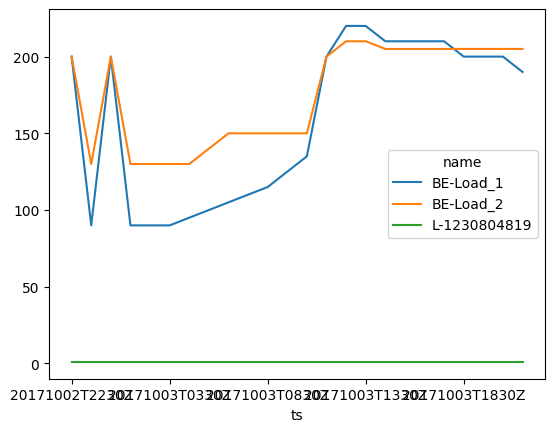

In [4]:
df.pivot(index='ts', columns='name', values='p').plot()